# Machine Translation

English-German Translation

using only full data. With random sample

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# What's life without style :). So, let's add style to our dataframes
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [0]:
import pandas as pd 
import string 
import pickle
from pickle import dump
from pickle import load
from string import digits
import re 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from numpy import array, argmax, random, take 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [5]:
from keras.models import Model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding,Input,RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint 
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model 
from keras import optimizers 

Using TensorFlow backend.


In [6]:
!  pip install version_information

In [7]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,re,sklearn, matplotlib,keras

Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
re 2.2.1
sklearn 0.21.3
matplotlib 3.0.3
keras 2.2.5
Wed Sep 11 15:24:19 2019 UTC

# 2)- Reading Dataset

In [0]:
lines= pd.read_pickle('full_data.pkl')

In [9]:
lines.shape

(22191, 2)

In [10]:
lines.head()

,eng,ger
0,Prague Stock Market falls to minus by the end of the trading day,Die Prager Börse stürzt gegen Geschäftsschluss ins Minus.
1,After a sharp drop in the morning,Nach dem steilen Abfall am Morgen konnte die Prager Börse die Verluste korrigieren.
2,Transactions with stocks from the Czech Energy Enterprise (ČEZ) reached nearly half of the regular daily trading.,Die Transaktionen mit den Aktien von ČEZ erreichten fast die Hälfte des normalen Tagesgeschäfts.
3,The Prague Stock Market immediately continued its fall from Monday at the beginning of Tuesday's trading,Die Prager Börse knüpfte gleich zu Beginn der Dienstagsgeschäfte an den Einbruch vom Montag an
4,This time the fall in stocks on Wall Street is responsible for the drop.,Diesmal lag der Grund für den Einbruch an der Wall Street.


As this is big data and I have a poor old computing machine. So, I ll use smaller sample. It got to be random to avoid sample biaseness

In [11]:
lines.sample(15)

,eng,ger
11261,"The wound is being cleaned, but Montreal would need its own investigative unit with ongoing monitoring, to avoid the return of these questionable practices.","Wir sind dabei, die Wunde zu säubern, bräuchten allerdings eine nur für Montreal bestimmte Ermittlungseinheit, sowie eine Aufsicht, um eine Rückkehr der fragwürdigen Praktiken zu verhindern."
1534,Paul Newman the Magnificent,Paul Newman der Wunderbare
10560,"Lastly, concerning palliative sedation already widely used in Canadian health institutions,the committee asks that it should be considered where it only serves to reduce physical pain, as does eut...",Zuletzt fordert das Gremium hinsichtlich der bereits in den kanadischen Institutionen zur Gesundheitspflege weitreichend angewendeten Mittel zu Schmerzlinderung oder lebensabschlieβender Maβnahmen...
18132,But even then Abbott didn't make the connection with his own case.,Aber auch jetzt verband Abbott dies nicht mit seinem eigenen Fall.
7341,"Apparently it is centred around a microbe that was found at the bottom of the Monkey Lake in the National Park Yosemite, California, where it lives in an environment that was considered too poison...","Scheinbar handelt es sich um eine Mikrobe, die auf dem Grund des Mono Lake im Yosemite-Nationalpark, Kalifornien, gefunden wurde. Sie lebt dort in einer Umgebung, die für zu giftig für alle erdenk..."
3272,So the targeting may yield political repercussions that go against that important agenda.,"Die Zielsetzung könnte politische Nachwirkungen hervorrufen, die gegen diesen wichtigen Tagesordnungspunkt arbeiten."
17529,"Among the detainees were 14 high-ranking officers, according to Hurriyet Daily News.","Unter den Verhafteten sind 14 hochrangige Polizisten, meldet Hürriyet Daily News."
10601,"The prime minister-designate had to form a team, most importantly comprising technocrats, even though he stressed that he would also like to include ""politicians.""","Der amtierende Premierminister solle einen aus vorwiegend Technokraten bestehenden Stab gründen, obwohl er betont hatte, gerne auch""Politiker"" miteinzubeziehen."
21664,"Equally, for those not depressed, a circle of mentally healthy friends halved the chances of mental challenges arising.","Für diejenigen, die nicht depressiv sind, halbiert ein Kreis von geistig gesunden Freunden die Risiken von mentalen Problemen."
1419,This project's goal is the reinstatement of the driver,Der Zweck ist die Resozialisierung des Fahrers


In [0]:
# choose 5000 random rows
lines=lines.sample(5000)

# 3)- Quick Preprocessing

In [0]:
# Lowercase all characters
lines.eng=lines.eng.apply(lambda x: x.lower())
lines.ger=lines.ger.apply(lambda x: x.lower())

In [0]:
# Remove quotes
lines.eng=lines.eng.apply(lambda x: re.sub("'", '', x))
lines.ger=lines.ger.apply(lambda x: re.sub("'", '', x))

In [0]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.ger=lines.ger.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [0]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines.eng=lines.eng.apply(lambda x: x.translate(remove_digits))
lines.ger=lines.ger.apply(lambda x: x.translate(remove_digits))

In [0]:
# Remove extra spaces
lines.eng=lines.eng.apply(lambda x: x.strip())
lines.ger=lines.ger.apply(lambda x: x.strip())
lines.eng=lines.eng.apply(lambda x: re.sub(" +", " ", x))
lines.ger=lines.ger.apply(lambda x: re.sub(" +", " ", x))

**Do threshold here**

In [0]:
# Add start and end tokens to target sequences. I am not German so , I am doing so for my ease
lines.ger = lines.ger.apply(lambda x : 'START_ '+ x + ' _END')

In [19]:
lines.ger[:5]

980                                                                                                                 START_ analysten der deutschen bank haben in einer mitteilung an investoren geschrieben _END
4719     START_ falls der fahrer nicht auf die warnung reagiert und sogar wenn der zusammenstoss schon unvermeidlich ist übt der bremsassistent den maximalen druck auf die bremsen aus um auf diese weise di...
18566                                                                                                                                                  START_ zwei besatzungsmitglieder galten als vermisst _END
16436                                                                                                                                                                 START_ und dann schließe ich das buch _END
2591     START_ die cssd hat vorgeschlagen dass sie den abfluss von geld salomonisch löst sie greift die cezaktiendividenden an bei denen der staat eigentümer der m

In [20]:
lines.sample(10)

,eng,ger
18481,mayor wolfgang wild and state secretary albert füracker have taken on the sponsorship,START_ die schirmherrschaft haben bürgermeister wolfgang wild und staatssekretär albert füracker übernommen _END
14481,except for the landing of arrival aircraft flight traffic was temporarily suspended it was reported,START_ bis auf landungen sei der flugverkehr vorübergehend eingestellt worden hieß es _END
2838,the mature infectious viral corpuscles would not occur if the hiv virus was not split by the hiv protease,START_ ohne die durch die hivprotease verursachte hivvirusspaltung würden keine reifen infektionsvirenpartikel entstehen _END
14478,users on twitter published photos of a swat officer and a weapon lying on the ground,START_ nutzer auf twitter veröffentlichten fotos von einem spezialeinsatzkommando und einem auf dem boden liegenden gewehr _END
12818,this image comes from a camera developed by german researchers at the max planck institute,START_ das bild kommt von einer kamera die deutsche forscher vom maxplanckinstitut entwickelt haben _END
3953,there may however always be a few difficult ones who remain uncooperative he added,START_ es wird jedoch wahrscheinlich immer einige widerspenstige geben die mit der einigung nicht zufrieden sind ergänzt er _END
15239,in germany many of these companies are global market leaders in their particular niche,START_ in deutschland sind viele dieser unternehmen weltweite marktführer in der jeweiligen nische _END
8081,that was also why there was no pressure from the home team in the first half long kicks behind the defence were neatly averted by the czech defence,START_ auch in der zweiten halbzeit blieb der druck der heimmannschaft aus und die weiten abschläge vor den strafraum wurden von der tschechischen abwehr erfolgreich abgewehrt _END
13766,it is incomprehensible that the interamerican commission on human rights is in washington under us funding he said referring to ecuador giving political asylum to wikileaks founder julian assange,START_ es ist unverständlich dass die interamerikanische kommission für menschenrechte ihren sitz in washington hat und von den vereinigten staaten finanziert wird erklärte er als anspielung auf d...
16289,margarine in place of butter a little more baking powder and bicarbonate of soda in place of egg proctor has even managed to astonish his inlaws with his vegan cheese cakes,START_ margarine statt butter etwas mehr backpulver und kohlensäure statt ei mit seinen veganen käsekuchen konnte proctor auch seine schwiegereltern zum staunen bringen _END


### 3a)- Vocab Size

In [0]:
# Vocabulary of English
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)
# Vocabulary of German 
all_german_words=set()
for ger in lines.ger:
    for word in ger.split():
        if word not in all_german_words:
            all_german_words.add(word)

In [22]:
# Max Length of source sequence
import numpy as np
lenght_list=[]
for l in lines.eng:
    lenght_list.append(len(l.split(' ')))
max_length_src = np.max(lenght_list)
max_length_src

108

In [23]:
# Max Length of target sequence
lenght_list=[]
for l in lines.ger:
    lenght_list.append(len(l.split(' ')))
max_length_tar = np.max(lenght_list)
max_length_tar

90

In [24]:
lines['word_eng'] = lines['eng'].apply(lambda x: len(str(x).split(" ")))
lines[['eng','word_eng']].head()

,eng,word_eng
980,the outlook for global equity,5
4719,if he does not react and even though the collision is unavoidable the device exerts the maximum force to the brakes to minimize damage,24
18566,two crew members are missing,5
16436,and then i close the book,6
2591,the čssd has suggested that the deficit be resolved solomonstyle – it should draw on čez dividends which are mostly stateowned and use those to top up the transport fund,30


In [25]:
# adding +2 due to adding of START and END
lines['word_ger'] = lines['ger'].apply(lambda x: len(str(x).split(" ")))
lines[['ger','word_ger']].head()

,ger,word_ger
980,START_ analysten der deutschen bank haben in einer mitteilung an investoren geschrieben _END,13
4719,START_ falls der fahrer nicht auf die warnung reagiert und sogar wenn der zusammenstoss schon unvermeidlich ist übt der bremsassistent den maximalen druck auf die bremsen aus um auf diese weise di...,40
18566,START_ zwei besatzungsmitglieder galten als vermisst _END,7
16436,START_ und dann schließe ich das buch _END,8
2591,START_ die cssd hat vorgeschlagen dass sie den abfluss von geld salomonisch löst sie greift die cezaktiendividenden an bei denen der staat eigentümer der majorität ist und aus diesen dann das geld...,38


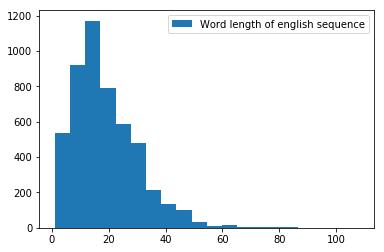

In [26]:
words_eng=lines['word_eng']
plt.hist(words_eng, bins=20, label="Word length of english sequence") 
plt.legend() 
plt.show()

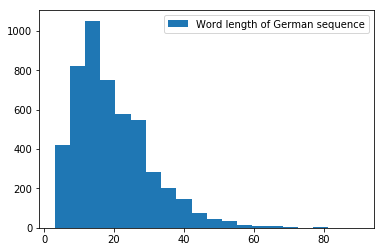

In [27]:
words_ger=lines['word_ger']
plt.hist(words_ger, bins=20, label="Word length of German sequence") 
plt.legend() 
plt.show()

### 3b)-Words' frequency

In [28]:
# let’s check the 10 most frequently occurring words in our English text data
freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[:10]
freq_eng

the     7233
of      3200
to      2664
in      2286
and     2148
a       2122
is      1152
that    1044
for      963
on       831
dtype: int64

In [29]:
freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[:12]
freq_ger

_END      5000
START_    5000
die       3337
der       3146
und       2071
in        1642
von       1104
das       1034
zu        1031
den       1003
mit        782
ist        780
dtype: int64

As we have start and end so, I did check 12 so that we get idea of most fequent words

**How about least occuring words**

In [30]:
less_freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[-10:]
less_freq_eng

mogul         1
littoral      1
ezulweni      1
ensuring      1
tomb          1
diminished    1
magnussen     1
usufruct      1
alsadd        1
reuter        1
dtype: int64

In [31]:
less_freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[-10:]
less_freq_ger

fänge          1
wänden         1
tagelangen     1
karitatives    1
engen          1
duldung        1
pflaster       1
baie           1
alassane       1
papierkram     1
dtype: int64

### 3a)- Defining input and target

In [32]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_german_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_german_words)
num_encoder_tokens, num_decoder_tokens

(13792, 19893)

In [33]:
num_decoder_tokens += 1 # For zero padding
num_decoder_tokens

19894

In [0]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [0]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [0]:
#print(reverse_input_char_index)

In [0]:
#print(reverse_target_char_index)

### 3b)-Train - Test Split

For validation

In [38]:
X, y = lines.eng, lines.ger #X being input, y being target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((4000,), (1000,))

**Save the train and test dataframes for reproducing the results later, as they are shuffled**

In [0]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [0]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# 4)-Encoder - Decoder Model Architecture

In [0]:
latent_dim = 50

In [42]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [44]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
#from IPython.display import Image
#Image(retina=True, filename='train.png')

In [0]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 15

In [47]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 50)     689600      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 50)     994700      input_2[0][0]                    
____________________________________________________________________________________________

In [48]:
history=model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)


Epoch 1/15
31/31 [==============================] - 52s 2s/step - loss: 9.0498 - acc: 0.0319 - val_loss: 8.0673 - val_acc: 0.0345
Epoch 2/15
31/31 [==============================] - 44s 1s/step - loss: 7.6922 - acc: 0.0361 - val_loss: 7.7200 - val_acc: 0.0353
Epoch 3/15
31/31 [==============================] - 44s 1s/step - loss: 7.4609 - acc: 0.0502 - val_loss: 7.7620 - val_acc: 0.0542
Epoch 4/15
31/31 [==============================] - 44s 1s/step - loss: 7.4275 - acc: 0.0536 - val_loss: 7.8627 - val_acc: 0.0552
Epoch 5/15
31/31 [==============================] - 44s 1s/step - loss: 7.4153 - acc: 0.0537 - val_loss: 7.9381 - val_acc: 0.0541
Epoch 6/15
31/31 [==============================] - 44s 1s/step - loss: 7.3924 - acc: 0.0537 - val_loss: 8.0113 - val_acc: 0.0537
Epoch 7/15
31/31 [==============================] - 44s 1s/step - loss: 7.3408 - acc: 0.0537 - val_loss: 8.0007 - val_acc: 0.0545
Epoch 8/15
31/31 [==============================] - 44s 1s/step - loss: 7.2937 - acc: 0.0

Results are consistent for smaller data sample of 2015. <br>
Validation accuracy is too low and loss(reflects error) is high. I wonder if we could predict any good results out of it?

In [0]:
# save model
model.save_weights('translate_attempt4.h5')

In [0]:
# for later use even in other notebooks
model.load_weights('translate_attempt4.h5')

# 5)- Inference Setup

In [0]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

# Decode sample sequeces

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']
  

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

# 6)- Model Validation

### 6a.Evaluation on Train Dataset

In [0]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [54]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: they insist with good reason on the setback of his naive dialogue with iran on the premature departure of the boys from iraq his tergiversations in libya labelling him weak
Actual German Translation:  sie beharren zu recht auf dem misserfolg seines naiven zwiegespräches mit dem iran des voreiligen abzugs seinerjungs aus dem irak seiner unentschlossenheit in libyen was ihm ebenfalls den ruf der schwäche einbrachte 
Predicted German Translation:  die die die die der der der der der der der der er


### 6b. Evaluation on Validation Dataset

In [0]:
val_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

In [56]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: next comes temperament and inner qualities
Actual German Translation:  dann kommen temperament und innere qualitäten 
Predicted German Translation:  die der 


**As expected, we got no good results. We better go back to data preprocessing part and re-build our model**

### 6c. Plotting Loss and Accuracy

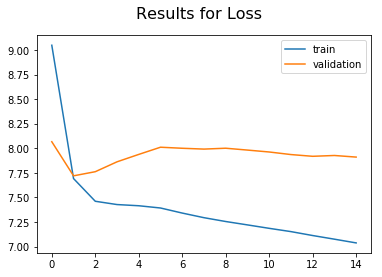

In [57]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['train','validation']) 
plt.suptitle('Results for Loss', fontsize=16)
plt.show()

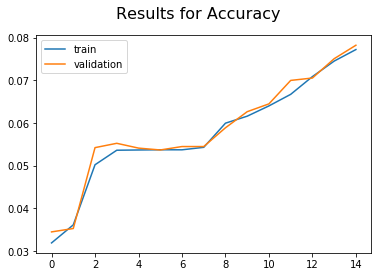

In [58]:
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.legend(['train','validation']) 
plt.suptitle('Results for Accuracy', fontsize=16)
plt.show()

- We can see that train and validation accuracies are low like in previous. Random sample has not made much difference.

Adding more rows is crushing my system. Either I need a better processor or I change my strategy.